In [1031]:
import pandas as pd
import warnings
from dateutil.parser import parse
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


warnings.filterwarnings('ignore')

In [1032]:
df_as = pd.read_csv("../data/original/ActivitySummary.csv")
df_as.shape

(556, 8)

In [1033]:
import datetime

# only relevant features
df_as_filtered = df_as[['dateComponents','activeEnergyBurned','appleExerciseTime','appleStandHours']]
       
# convert to time
for (index, value) in df_as_filtered.iterrows():
    correct_time = datetime.datetime.strptime(value['dateComponents'], '%Y-%m-%d')
    df_as_filtered.at[index, 'creationDate'] = correct_time
    df_as_filtered.at[index, 'appleExerciseTime'] = value['appleExerciseTime'] * 60
    

df_as_final = df_as_filtered[['creationDate', 'activeEnergyBurned', 'appleExerciseTime', 'appleStandHours']]

df_as_final.head()

,creationDate,activeEnergyBurned,appleExerciseTime,appleStandHours
0,2018-01-14,0.00,0,0
1,2018-01-15,0.00,0,0
2,2018-01-16,356.84,1200,13
3,2018-01-17,409.93,1260,17
4,2018-01-18,369.31,600,15


In [1034]:
df_copy = df_as_final.set_index('creationDate')
df_copy.head()

,activeEnergyBurned,appleExerciseTime,appleStandHours
creationDate,,,
2018-01-14,0.00,0,0
2018-01-15,0.00,0,0
2018-01-16,356.84,1200,13
2018-01-17,409.93,1260,17
2018-01-18,369.31,600,15


In [1035]:
df_hrv = pd.read_csv("../data/original/HeartRateVariabilitySDNN.csv")
df_hrv.shape

(932, 9)

In [1036]:
df_hrv_filtered = df_hrv[['creationDate', 'value']]

# df_hrv_copy = df_hrv_filtered.set_index('creationDate')
# df_hrv_copy.head()

# convert from string to datetime
df_hrv_filtered['creationDate'] = pd.to_datetime(df_hrv_filtered['creationDate'])
# mean per day
df_hrv_final = df_hrv_filtered.groupby(df_hrv_filtered['creationDate'].dt.date).mean()

df_hrv_filtered.head()



,creationDate,value
0,2018-01-16 09:50:18+02:00,32.40
1,2018-01-16 09:55:05+02:00,45.11
2,2018-01-16 14:52:15+02:00,27.38
3,2018-01-16 21:24:11+02:00,41.42
4,2018-01-18 09:08:50+02:00,41.05


In [1037]:
df_mindful = pd.read_csv("../data/original/MindfulSession.csv")
df_mindful.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Headspace,8769,nan,MindfulSession,nan,2018-01-14 11:16:40 +0200,2018-01-14 11:15:45 +0200,2018-01-14 11:16:05 +0200,nan
1,Headspace,8769,nan,MindfulSession,nan,2018-01-14 11:16:40 +0200,2018-01-14 11:16:06 +0200,2018-01-14 11:16:11 +0200,nan
2,Headspace,8769,nan,MindfulSession,nan,2018-01-14 11:16:40 +0200,2018-01-14 11:16:12 +0200,2018-01-14 11:16:14 +0200,nan
3,Headspace,8769,nan,MindfulSession,nan,2018-01-14 11:16:40 +0200,2018-01-14 11:16:15 +0200,2018-01-14 11:16:18 +0200,nan
4,Headspace,8769,nan,MindfulSession,nan,2018-01-14 11:16:40 +0200,2018-01-14 11:16:20 +0200,2018-01-14 11:16:20 +0200,nan


In [1038]:
# removed redundant features
df_mindful_filtered = df_mindful[['creationDate','startDate', 'endDate']]
df_mindful_filtered.head()

# calculated duration between startDate and endDate
df_mindful_filtered['duration'] = [time for 
                               time in 
                               pd.to_datetime(df_mindful['endDate']) - pd.to_datetime(df_mindful['startDate'])]

df_mindful_final = df_mindful_filtered[['creationDate', 'duration']]

# converted duration to seconds format
df_mindful_filtered['seconds'] = df_mindful_filtered['duration'].dt.total_seconds()
df_mindfulness = df_mindful_filtered[['creationDate', 'seconds']]

# grouped days by seconds meditated
df_final_mindful = df_mindfulness.groupby(pd.to_datetime(df_mindfulness['creationDate']).dt.date).sum()
df_final_mindful.head()



,seconds
creationDate,
2018-01-14,1393.00
2018-01-16,689.00
2018-01-20,1382.00
2018-01-22,1792.00
2018-01-23,705.00


In [1039]:
df_step = pd.read_csv("../data/original/StepCount.csv")
df_step.shape

(38408, 9)

In [1040]:
df_step_filtered = df_step[['creationDate', 'value']]
df_step_filtered.head()

,creationDate,value
0,2018-01-13 00:37:45 +0200,12
1,2018-01-13 00:37:45 +0200,4
2,2018-01-13 01:39:00 +0200,77
3,2018-01-13 10:38:15 +0200,16
4,2018-01-13 15:42:21 +0200,13


In [1041]:
# convert from string to datetime
df_step_filtered['creationDate'] = pd.to_datetime(df_step_filtered['creationDate'])
# sum total per day
df_step_final = df_step_filtered.groupby(df_step_filtered['creationDate'].dt.date).sum()

df_step_final.shape

# for (item, value) in df_step_final.iterrows():
#     print(value)
#     break


(626, 1)

In [1042]:
for (index, row) in df_step_final.reset_index().iterrows():
    print(index)
    print(row)
    creationDate, value = row
    print(creationDate)
    print(value)
    break

0
creationDate    2018-01-13
value                 8337
Name: 0, dtype: object
2018-01-13
8337


In [1043]:
df_flights_climbed = pd.read_csv("../data/original/FlightsClimbed.csv")
# df_flights_climbed.head()

In [1044]:
df_flights_climbed_filtered = df_flights_climbed[['creationDate', 'value']]
# df_flights_climbed_filtered.shape

In [1045]:
time = df_flights_climbed_filtered['creationDate']
time = pd.to_datetime(time)

# df_flights_climbed_filtered.groupby(df_flights_climbed_filtered['creationDate'].dt.date).sum()

df_flights_final = df_flights_climbed_filtered.groupby(time.dt.date).sum()
df_flights_final.head()



# df_flights_climbed_filtered.head()
# DID:
# 1 - removed redundant columns
# 2 - sum per day of flights climbed

,value
creationDate,
2018-01-13,3
2018-01-14,2
2018-01-15,23
2018-01-16,9
2018-01-17,5


## Aggregate ActivitySummary with all activities

In [1046]:
from tabulate import tabulate


results = pd.DataFrame()
# results['Date'] = df_step_final['creationDate']
results['Step Count'] = df_step_final['value']
results['Flights Climbed'] = df_flights_final['value']
results['Meditations (seconds)'] = df_final_mindful['seconds']
results['Active Energy Burned (kcal)'] = df_copy['activeEnergyBurned']
results['Exercise Time (seconds)'] = df_copy['appleExerciseTime']
results['Stand up number'] = df_copy['appleStandHours']
results['Heart Rate Variability (SDNN)'] = df_hrv_final['value']


results = results.reset_index()

results.head()
# results.to_csv('../data/summary_shaped.csv')

# for (index, row) in results.iterrows():
#     print(type(row['creationDate']))
#     print(pd.to_datetime('2018-01-01'))
#     break




,creationDate,Step Count,Flights Climbed,Meditations (seconds),Active Energy Burned (kcal),Exercise Time (seconds),Stand up number,Heart Rate Variability (SDNN)
0,2018-01-13,8337,3.00,nan,nan,nan,nan,nan
1,2018-01-14,9058,2.00,1393.00,0.00,0.00,0.00,nan
2,2018-01-15,6697,23.00,nan,0.00,0.00,0.00,nan
3,2018-01-16,10752,9.00,689.00,356.84,1200.00,13.00,36.58
4,2018-01-17,10649,5.00,nan,409.93,1260.00,17.00,nan


In [1048]:
import seaborn as sns
from matplotlib import dates
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

In [1106]:
hrv_merged = pd.DataFrame()


def at_work(row):
    hour = pd.to_datetime(row['creationDate']).hour
    weekday = pd.to_datetime(row['creationDate']).isoweekday()
    
    if((hour >= 9 and hour <17) and weekday < 6):
        # print(pd.to_datetime(row['creationDate']), (weekday))
        return 1
    return 0
    
# winter is from 1st of November to 1st of April
def is_winter(row):
    month = pd.to_datetime(row['creationDate'], format='%d/%m').month
    
    if(month >= 10 or month < 4):
        return 1
    return 0

def is_higher_than_mean(row):
    mean = 41.25
    if row.value > mean:
        return 1
    return 0
    
hrv_merged['date'] = df_hrv_filtered['creationDate']
hrv_merged['HRV (SDNN)'] = df_hrv_filtered['value']
work_hours = []
winter_time = []
above_mean = []
for (index, row) in df_hrv_filtered.iterrows():
    work_hours.append(at_work(row))
    winter_time.append(is_winter(row))
    above_mean.append(is_higher_than_mean(row))

    
    
hrv_merged['Is at Work (binary)'] = work_hours
hrv_merged['Is Winter time (binary)'] = winter_time
hrv_merged['Is Above Mean Value'] = above_mean

hrv_merged.to_csv('../data/hrv_shaped.csv')
hrv_summary = hrv_merged.describe()

# print(tabulate(hrv_summary, tablefmt="pipe", headers="keys"))
# results.head()

# hrv_copy = hrv_merged.set_index('date')

# hrv_copy.head()
hrv_scaled = scaler.fit_transform(hrv_copy)
# # hrv_summary


# new_pd = pd.DataFrame(hrv_scaled)

# new_pd.head()
hrv_merged = hrv_merged.set_index('date')
hrv_scaled = scaler.fit_transform(hrv_copy)
df_hrv_scaled = pd.DataFrame(hrv_scaled)
df_hrv_scaled.describe()


,0,1,2
count,932.00,932.00,932.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-2.11,-0.79,-0.68
25%,-0.66,-0.79,-0.68
50%,-0.16,-0.79,-0.68
75%,0.53,0.85,0.80
max,8.44,4.56,6.99


In [1107]:
from sklearn.metrics.pairwise import pairwise_distances

jac_sim = 1 - pairwise_distances(hrv_merged.T, metric = "hamming")
jac_sim = pd.DataFrame(jac_sim, index=hrv_merged.columns, columns=hrv_merged.columns)

# sklearn.metrics.jaccard_score()

jac_sim.head()

,HRV (SDNN),Is at Work (binary),Is Winter time (binary),Is Above Mean Value
HRV (SDNN),1.00,0.00,0.00,0.00
Is at Work (binary),0.00,1.00,0.47,0.53
Is Winter time (binary),0.00,0.47,1.00,0.52
Is Above Mean Value,0.00,0.53,0.52,1.00


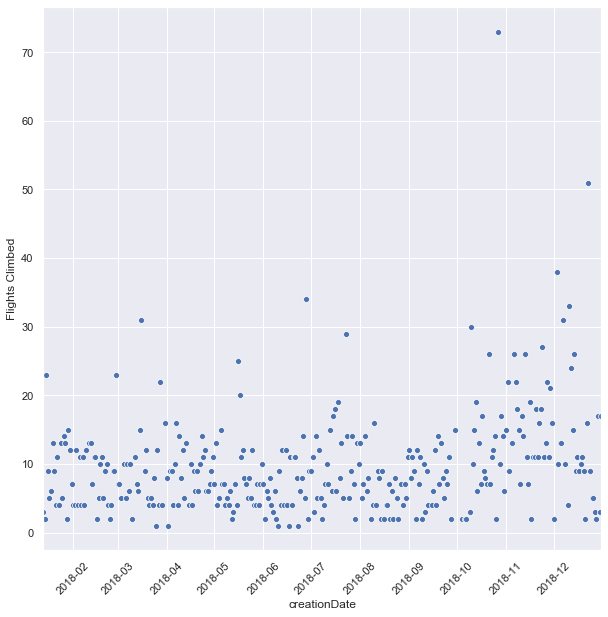

In [1049]:
# results = results.reset_index()
plt.figure(figsize=(10,10))

ax = sns.scatterplot(x=results['creationDate'], y=results['Flights Climbed'], data=results)
ax.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2018-12-31')))
for item in ax.get_xticklabels():
    item.set_rotation(45)
    


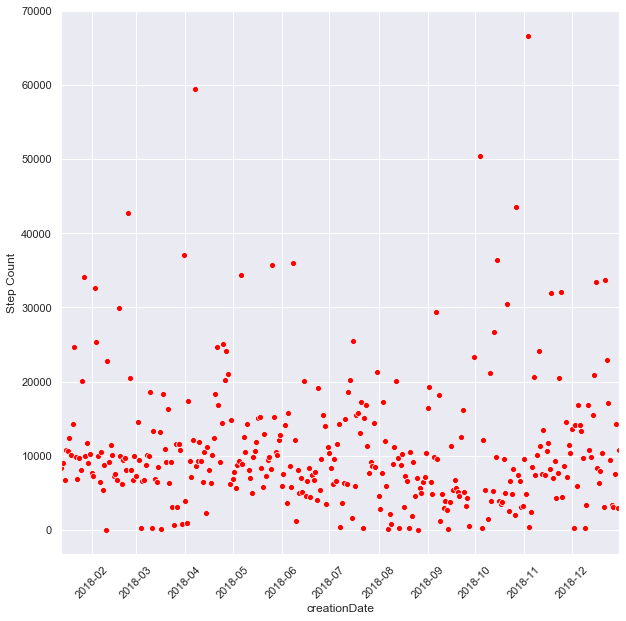

In [1050]:
plt.figure(figsize=(10,10))
bx = sns.scatterplot(x=results['creationDate'], y=results['Step Count'], data=results, color='red')
bx.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2018-12-31')))
for item in bx.get_xticklabels():
    item.set_rotation(45)

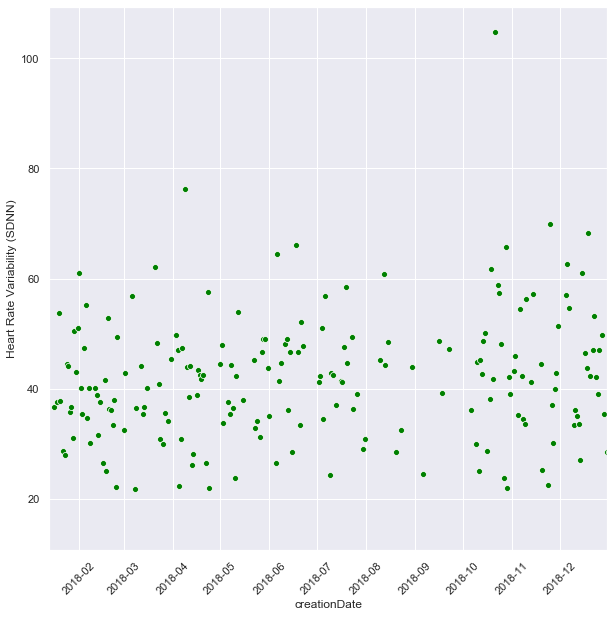

In [1051]:
plt.figure(figsize=(10,10))
cx = sns.scatterplot(x=results['creationDate'], y=results['Heart Rate Variability (SDNN)'], data=results, color='green')
cx.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2018-12-31')))
for item in cx.get_xticklabels():
    item.set_rotation(45)

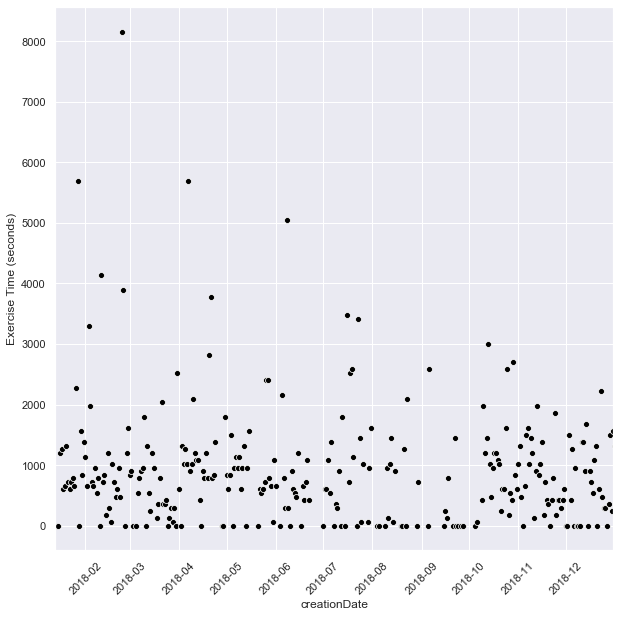

In [1052]:
plt.figure(figsize=(10,10))
dx = sns.scatterplot(x=results['creationDate'], y=results['Exercise Time (seconds)'], data=results, color='black')
dx.set(xlim = (pd.to_datetime('2018-01-13'), pd.to_datetime('2018-12-31')))
for item in dx.get_xticklabels():
    item.set_rotation(45)

,creationDate,Step Count,Flights Climbed,Meditations (seconds),Active Energy Burned (kcal),Exercise Time (seconds),Stand up number,Heart Rate Variability (SDNN)
3,2018-01-16,10752,9.00,689.00,356.84,1200.00,13.00,36.58
7,2018-01-20,14288,9.00,1382.00,337.80,1320.00,13.00,37.75
9,2018-01-22,9850,11.00,1792.00,259.99,600.00,10.00,28.64
10,2018-01-23,6884,4.00,705.00,337.47,720.00,16.00,28.00
14,2018-01-27,34061,13.00,1398.00,666.70,5700.00,8.00,36.57
...,...,...,...,...,...,...,...,...
417,2019-03-12,21661,23.00,901.00,637.54,2460.00,15.00,69.71
419,2019-03-14,9300,9.00,601.00,415.49,720.00,13.00,36.72
423,2019-03-18,11675,16.00,1082.00,450.05,1440.00,15.00,53.51
426,2019-03-21,16744,34.00,685.00,555.85,1920.00,15.00,40.33


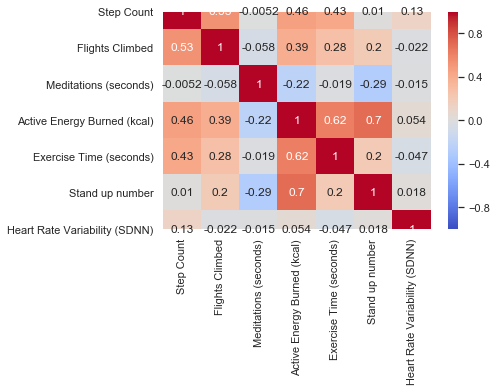

In [1053]:
# results = results.reset_index()

sns.set(style="whitegrid")
sns.heatmap(results.dropna().corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

# results.dropna().corr()
df = results.dropna()

df
# f = plt.figure(figsize=(19, 15))
# plt.matshow(df.corr(), fignum=f.number)
# plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
# plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

In [1148]:
# results=results.set_index('creationDate')
data_scaled = scaler.fit_transform(results.dropna())

# data_scaled.min(axis=0)
df_standardized = pd.DataFrame(data_scaled)


results
results.head()

# sns.heatmap(standardized.corr(),
#             vmin=-1,
#             cmap='coolwarm',
#             annot=True);

# print(data_scaled.min(axis=0))



,Step Count,Flights Climbed,Meditations (seconds),Active Energy Burned (kcal),Exercise Time (seconds),Stand up number,Heart Rate Variability (SDNN)
creationDate,,,,,,,
2018-01-13,8337,3.00,nan,nan,nan,nan,nan
2018-01-14,9058,2.00,1393.00,0.00,0.00,0.00,nan
2018-01-15,6697,23.00,nan,0.00,0.00,0.00,nan
2018-01-16,10752,9.00,689.00,356.84,1200.00,13.00,36.58
2018-01-17,10649,5.00,nan,409.93,1260.00,17.00,nan


In [1067]:
results.dropna().describe()

,Step Count,Flights Climbed,Meditations (seconds),Active Energy Burned (kcal),Exercise Time (seconds),Stand up number,Heart Rate Variability (SDNN)
count,111.00,111.00,111.00,111.00,111.00,111.00,111.00
mean,11679.50,13.88,1009.07,368.49,1093.51,11.12,42.82
std,7862.59,10.37,532.34,157.17,919.77,3.79,12.32
min,266.00,2.00,60.00,2.68,0.00,1.00,21.95
25%,6682.50,6.50,690.00,274.45,450.00,9.00,35.10
50%,9850.00,12.00,811.00,356.84,900.00,12.00,41.77
75%,14222.00,17.50,1351.50,451.42,1440.00,14.00,49.20
max,43598.00,73.00,3675.00,863.35,5700.00,19.00,104.89


In [1149]:
df_standardized.columns=  ['Step Count','Flights Climbed','Meditations (seconds)','Active Energy Burned (kcal)','Exercise Time (seconds)','Stand up number','Heart Rate Variability (SDNN)']
pd.options.display.float_format = '{:.2f}'.format
df_standardized.round(1)
df_standardized.head()

,Step Count,Flights Climbed,Meditations (seconds),Active Energy Burned (kcal),Exercise Time (seconds),Stand up number,Heart Rate Variability (SDNN)
0,-0.12,-0.47,-0.60,-0.07,0.12,0.50,-0.51
1,0.33,-0.47,0.70,-0.20,0.25,0.50,-0.41
2,-0.23,-0.28,1.48,-0.69,-0.54,-0.30,-1.16
3,-0.61,-0.96,-0.57,-0.20,-0.41,1.29,-1.21
4,2.86,-0.09,0.73,1.91,5.03,-0.83,-0.51


# PCA

In [1222]:
# standardize


features = ['Step Count','Flights Climbed','Meditations (seconds)','Active Energy Burned (kcal)','Exercise Time (seconds)','Stand up number']

# features
X = df_standardized.loc[:,features].values

# target
y = df_standardized.loc[:, ['Heart Rate Variability (SDNN)']].values

df_standardized.describe()


# results_nona.set_index('creationDate')
# results_nona.head()



,Step Count,Flights Climbed,Meditations (seconds),Active Energy Burned (kcal),Exercise Time (seconds),Stand up number,Heart Rate Variability (SDNN)
count,111.00,111.00,111.00,111.00,111.00,111.00,111.00
mean,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.46,-1.15,-1.79,-2.34,-1.19,-2.68,-1.70
25%,-0.64,-0.72,-0.60,-0.60,-0.70,-0.56,-0.63
50%,-0.23,-0.18,-0.37,-0.07,-0.21,0.23,-0.09
75%,0.32,0.35,0.65,0.53,0.38,0.76,0.52
max,4.08,5.73,5.03,3.16,5.03,2.09,5.06


In [1275]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(X)

df_principal = pd.DataFrame(data = principal_components
             , columns = [0,1])


# pca.explained_variance_, pca.components_, pca.get_covariance() 


# it's the pc directions
pca.components_

# fig 3.9
# give v1 and v2 (and vn...)
# pca.explained_variance_

# df_final = pd.concat([df_principal, results[['Heart Rate Variability (SDNN)']]], axis = 1)

# df_final.head(50)

array([[ 0.40694285,  0.39598671, -0.16370949,  0.5625737 ,  0.43821555,
         0.37718592],
       [ 0.48157893,  0.30238006,  0.55206347, -0.17148373,  0.18407518,
        -0.55550304]])

In [1263]:
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=2)

# svd.fit(X)  
# TruncatedSVD(algorithm='randomized', n_components=2)
# print(svd.explained_variance_ratio_)

# print(svd.explained_variance_ratio_.sum())  

# print(svd.singular_values_)


In [1277]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris.data


from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(3)

svd.fit_transform(X)

svd.explained_variance_

# svd.components_

# iris_transformed

# sns.scatterplot(x=iris_transformed, y=iris_data)



array([2.6270514 , 1.31527075, 0.85051091])